### Compare if author has been diagnosed with mental health disorder and comfort talking to current supervisor about mental health issues or concerns.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import scipy.stats as st

---

In [12]:
# Read saved data
squeaky_2016 = Path("Resources/2016-cleaned.csv")
diagnosis_comfort_superv_df = pd.read_csv(squeaky_2016)

# Display sample data
diagnosis_comfort_superv_df.head()

,Unnamed: 0,age,original_gender,gender,country,remote,num_employees,disorder_past,disorder_current,bring_up_phys_issue_in_interview,bring_up_mh_issue_in_interview,obs_exper_bad_resp_cur_prev,obs_of_other_inhibit_discuss_curr,comf_discuss_mh_disorder_cur_superv,willing_discuss_mh_issue_prev_superv,request_med_leave,age groups
0,0,39,Male,male,United Kingdom,Sometimes,26-100,Yes,No,Maybe,Maybe,No,No Response,Yes,Some of my previous employers,Very easy,35-44
1,1,29,male,male,United States of America,Never,25-Jun,Yes,Yes,Maybe,No,No,No Response,Yes,Some of my previous employers,Somewhat easy,25-34
2,2,38,Male,male,United Kingdom,Always,25-Jun,Maybe,No,Yes,Yes,Maybe/Not sure,Yes,Maybe,I don't know,Neither easy nor difficult,35-44
3,3,43,male,male,United Kingdom,Sometimes,No Response,Yes,Yes,Yes,Maybe,No,No Response,No Response,Some of my previous employers,No Response,35-44
4,4,43,Female,female,United States of America,Sometimes,25-Jun,Yes,Yes,Maybe,No,"Yes, I experienced",Yes,No,Some of my previous employers,Neither easy nor difficult,35-44


#### No current mental health diagnosis and comfort talking to supervisor

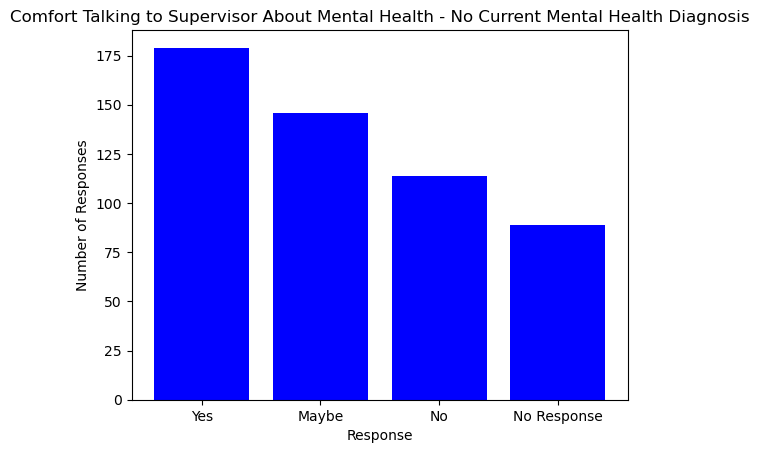

In [13]:
# Build plot for Do you have a current MH diagnosis and comfort level talking to current supervisor?
no_answer = diagnosis_comfort_superv_df.loc[diagnosis_comfort_superv_df["disorder_current"] == "No", :]
no_answer_mh = no_answer[["comf_discuss_mh_disorder_cur_superv", "disorder_current"]]

no_answer = pd.DataFrame(no_answer_mh["comf_discuss_mh_disorder_cur_superv"].value_counts())
no_answer.index.names = ["no MH diagnosis"]
plt.bar(no_answer.index, no_answer["count"], color = "blue")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health - No Current Mental Health Diagnosis")
#plt.legend(title="Comfort Talking to Supervisor About Mental Health & No Current Mental Health Diagnosis", loc="best")
plt.xlabel("Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/diagnosis_nocurrentdiag.png")

# Show plot
plt.show()

#### Current mental health diagnosis and comfort talking to supervisor

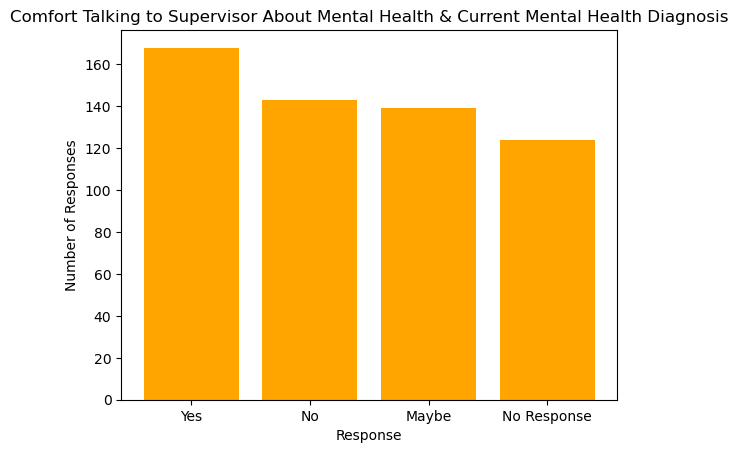

In [14]:
# Build plot for Do you have a current MH diagnosis and comfort level talking to current supervisor?
yes_answer = diagnosis_comfort_superv_df.loc[diagnosis_comfort_superv_df["disorder_current"] == "Yes", :]
yes_answer_mh = yes_answer[["comf_discuss_mh_disorder_cur_superv", "disorder_current"]]

yes_answer = pd.DataFrame(yes_answer_mh["comf_discuss_mh_disorder_cur_superv"].value_counts())
yes_answer.index.names = ["yes MH diagnosis"]
plt.bar(yes_answer.index, yes_answer["count"], color = "orange")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health & Current Mental Health Diagnosis")
plt.xlabel("Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/diagnosis_yescurrentdiag.png")

# Show plot
plt.show()



#### Possible current mental health diagnosis and comfort talking to supervisor


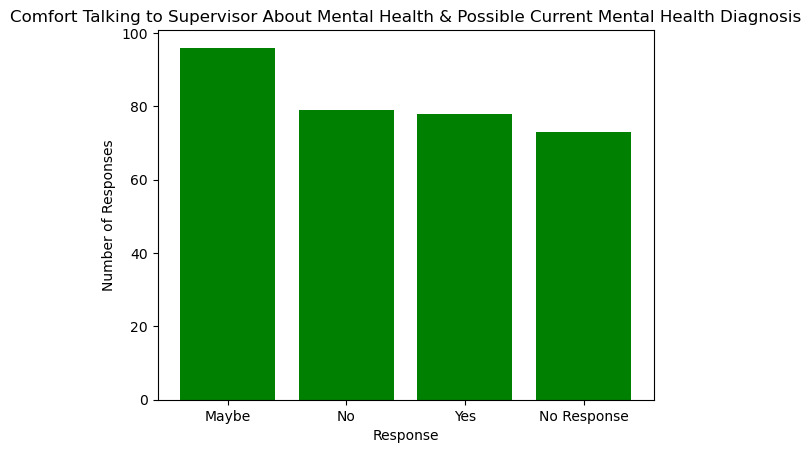

In [15]:
# Build plot for Do you have a current MH diagnosis and comfort level talking to current supervisor?
maybe_answer = diagnosis_comfort_superv_df.loc[diagnosis_comfort_superv_df["disorder_current"] == "Maybe", :]
maybe_answer[["comf_discuss_mh_disorder_cur_superv", "disorder_current"]]

maybe_answer = pd.DataFrame(maybe_answer["comf_discuss_mh_disorder_cur_superv"].value_counts())
maybe_answer.index.names = ["maybe MH diagnosis"]
plt.bar(maybe_answer.index, maybe_answer["count"], color = "green")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Comfort Talking to Supervisor About Mental Health & Possible Current Mental Health Diagnosis")
plt.xlabel("Response")
plt.ylabel("Number of Responses")

# Save the figure
plt.savefig("Figures/diagnosis_maybecurrentdiag.png")

# Show plot
plt.show()

In [16]:
no_answer

,count
no MH diagnosis,
Yes,179
Maybe,146
No,114
No Response,89


In [17]:
yes_answer

,count
yes MH diagnosis,
Yes,168
No,143
Maybe,139
No Response,124


In [18]:
maybe_answer

,count
maybe MH diagnosis,
Maybe,96
No,79
Yes,78
No Response,73


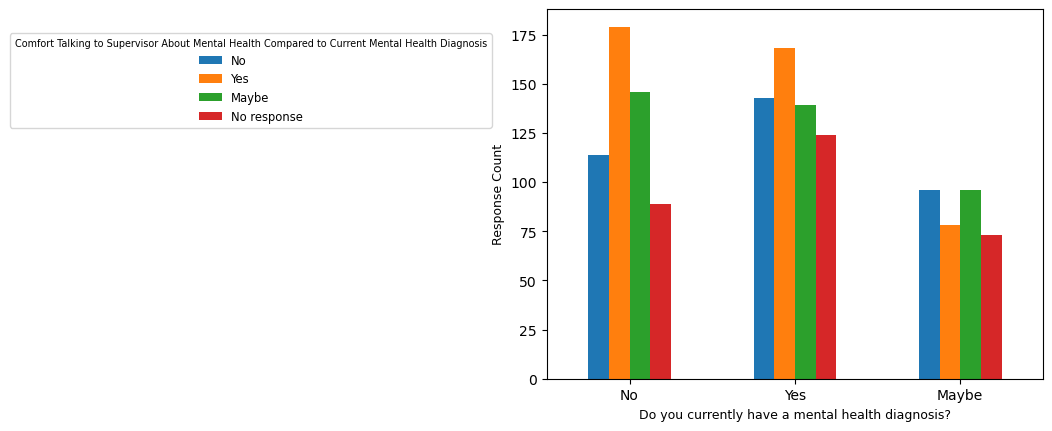

In [22]:
MH_diagnosis = ["No", "Yes", "Maybe"]
no_number = [114, 143, 96]
yes_number = [179, 168, 78]
maybe_number = [146, 139, 96]
no_response = [89, 124, 73]

MH_diagnosis_df = pd.DataFrame({"No": no_number, "Yes": yes_number, "Maybe": maybe_number, "No response": no_response}, index=MH_diagnosis)
MH_diagnosis_df.plot.bar(rot=0)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Comfort Talking to Supervisor About Mental Health Compared to Current Mental Health Diagnosis", loc="best", title_fontsize="x-small", bbox_to_anchor=(-0.1, 0.95), fontsize="small")
plt.xlabel("Do you currently have a mental health diagnosis?", size=9)
plt.ylabel("Response Count", size=9)

# Save the figure
plt.savefig("Figures/diagnosis_fullcurrentdiag.png")
plt.show()